## CPSC 375 Final Project Report

**Group Members:** Zeid Aldaas

# Stage 1: Exploratory Data Analysis

In this initial exploratory data analysis (EDA) stage, the goal was to understand the dataset and identify which variables might be used later to predict the Total Fitness Factor Score (FFTotal). Since the dataset contained several variables with extensive missing values, part of this process involved identifying and removing such variables to ensure a cleaner subset for modeling later on.

## Steps Completed

1. **Data Loading & Cleaning:**  
   - Loaded the dataset `HSData.csv` into a Pandas DataFrame.  
   - Dropped unnamed columns that appeared due to CSV formatting issues.  
   - Checked for missing values across all columns to determine which variables had too few data points to be useful.
   - Dropped columns with extensive missing data (`Waist`, `BIA_percent_Fat`, `SF 1`, `SF 2`, `SF 3`).

2. **Variable Selection for Exploration:**  
   Based on the data dictionary provided and domain knowledge of physical fitness, we selected the following variables for initial exploration alongside the target `FFTotal`:
   - **Age:** Represents the age of the subject, a common demographic factor.
   - **Ht (Height):** Basic anthropometric measure, easy to relate to overall fitness.
   - **Wt (Weight):** Another anthropometric measure, often used with height to approximate body composition (e.g., BMI).
   - **VC (Vital Capacity):** A measure of lung capacity, potentially related to aerobic fitness.
   - **HR rest (Resting Heart Rate):** A key cardiovascular fitness indicator.
   - **FFTotal (Total Fitness Factor Score):** The target variable we aim to approximate.

   These variables were chosen because they are likely related to overall fitness and had relatively fewer missing values than others.

3. **Visualization and Correlation Analysis:**
   - Created pairwise plots (`sns.pairplot`) to visualize relationships between the selected predictor variables and FFTotal, as well as among each other.
   - Generated scatter plots of each chosen predictor variable against FFTotal for a more direct visualization of their potential relationship.
   - Computed and visualized a correlation matrix (via `sns.heatmap`) to identify the strength and direction of linear relationships between the variables and FFTotal.

## Preliminary Observations

From the pairplots and scatter plots, we can see that the chosen variables (Age, Ht, Wt, VC, HR rest) do not exhibit strong linear relationships with the Total Fitness Factor Score (FFTotal). The data points appear widely dispersed, suggesting that a simple linear association may not be sufficient to explain variations in FFTotal.

The correlation matrix provides a more quantitative measure:  
- VC (Vital Capacity) has the strongest positive correlation with FFTotal (approximately 0.26), indicating that higher lung capacity may relate modestly to better overall fitness as represented by FFTotal.  
- Ht (Height) shows a small positive correlation (around 0.15).  
- Wt (Weight) displays a weak negative correlation (around -0.24), suggesting that heavier individuals in this dataset might have slightly lower FFTotal on average, but this relationship is not very strong.  
- HR rest (Resting Heart Rate) and Age both have very small negative correlations (-0.11 and -0.07 respectively) with FFTotal, indicating these factors alone might not be strong predictors of fitness score.  
- Overall, no single variable stands out as a dominant predictor. This finding suggests that FFTotal likely depends on a combination of factors or may require transformations and more complex modeling approaches to capture the underlying relationships.

In [ ]:
# ==================================
#      CPSC 375 FINAL PROJECT
# ==================================

# Group members: Zeid Aldaas

# ----------------------------------
# Stage 1: Exploratory Data Analysis
# ----------------------------------

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('HSData.csv')

# Drop unnamed columns
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

# Quick inspection
display(data.isnull().sum()[data.isnull().sum() > 0])

# Drop columns with lots of missing values
data = data.drop(columns=['Waist', 'BIA_percent_Fat', 'SF 1', 'SF 2', 'SF 3'])

# Reinspect
display(data.info())

,0
BIA_percent_Fat,4680
SF 1,1596
SF 2,1596
SF 3,1596
Waist,5528
PL 3,380
HR 3,380
RPE 3,393


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 30 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Idnum    6276 non-null   object 
 1   Date     6276 non-null   object 
 2   Sex      6276 non-null   object 
 3   Age      6276 non-null   int64  
 4   Ht       6276 non-null   float64
 5   Wt       6276 non-null   float64
 6   RF 2     6276 non-null   int64  
 7   RF 3     6276 non-null   int64  
 8   RF 4     6276 non-null   int64  
 9   RF 5     6276 non-null   int64  
 10  FF       6276 non-null   float64
 11  RGM      6276 non-null   float64
 12  LGM      6276 non-null   float64
 13  VC       6276 non-null   float64
 14  TA       6276 non-null   int64  
 15  PB       6276 non-null   float64
 16  SBP      6276 non-null   int64  
 17  DBP      6276 non-null   int64  
 18  HR rest  6276 non-null   int64  
 19  Stages   6276 non-null   int64  
 20  PL 1     6276 non-null   int64  
 21  HR 1     6276 

None

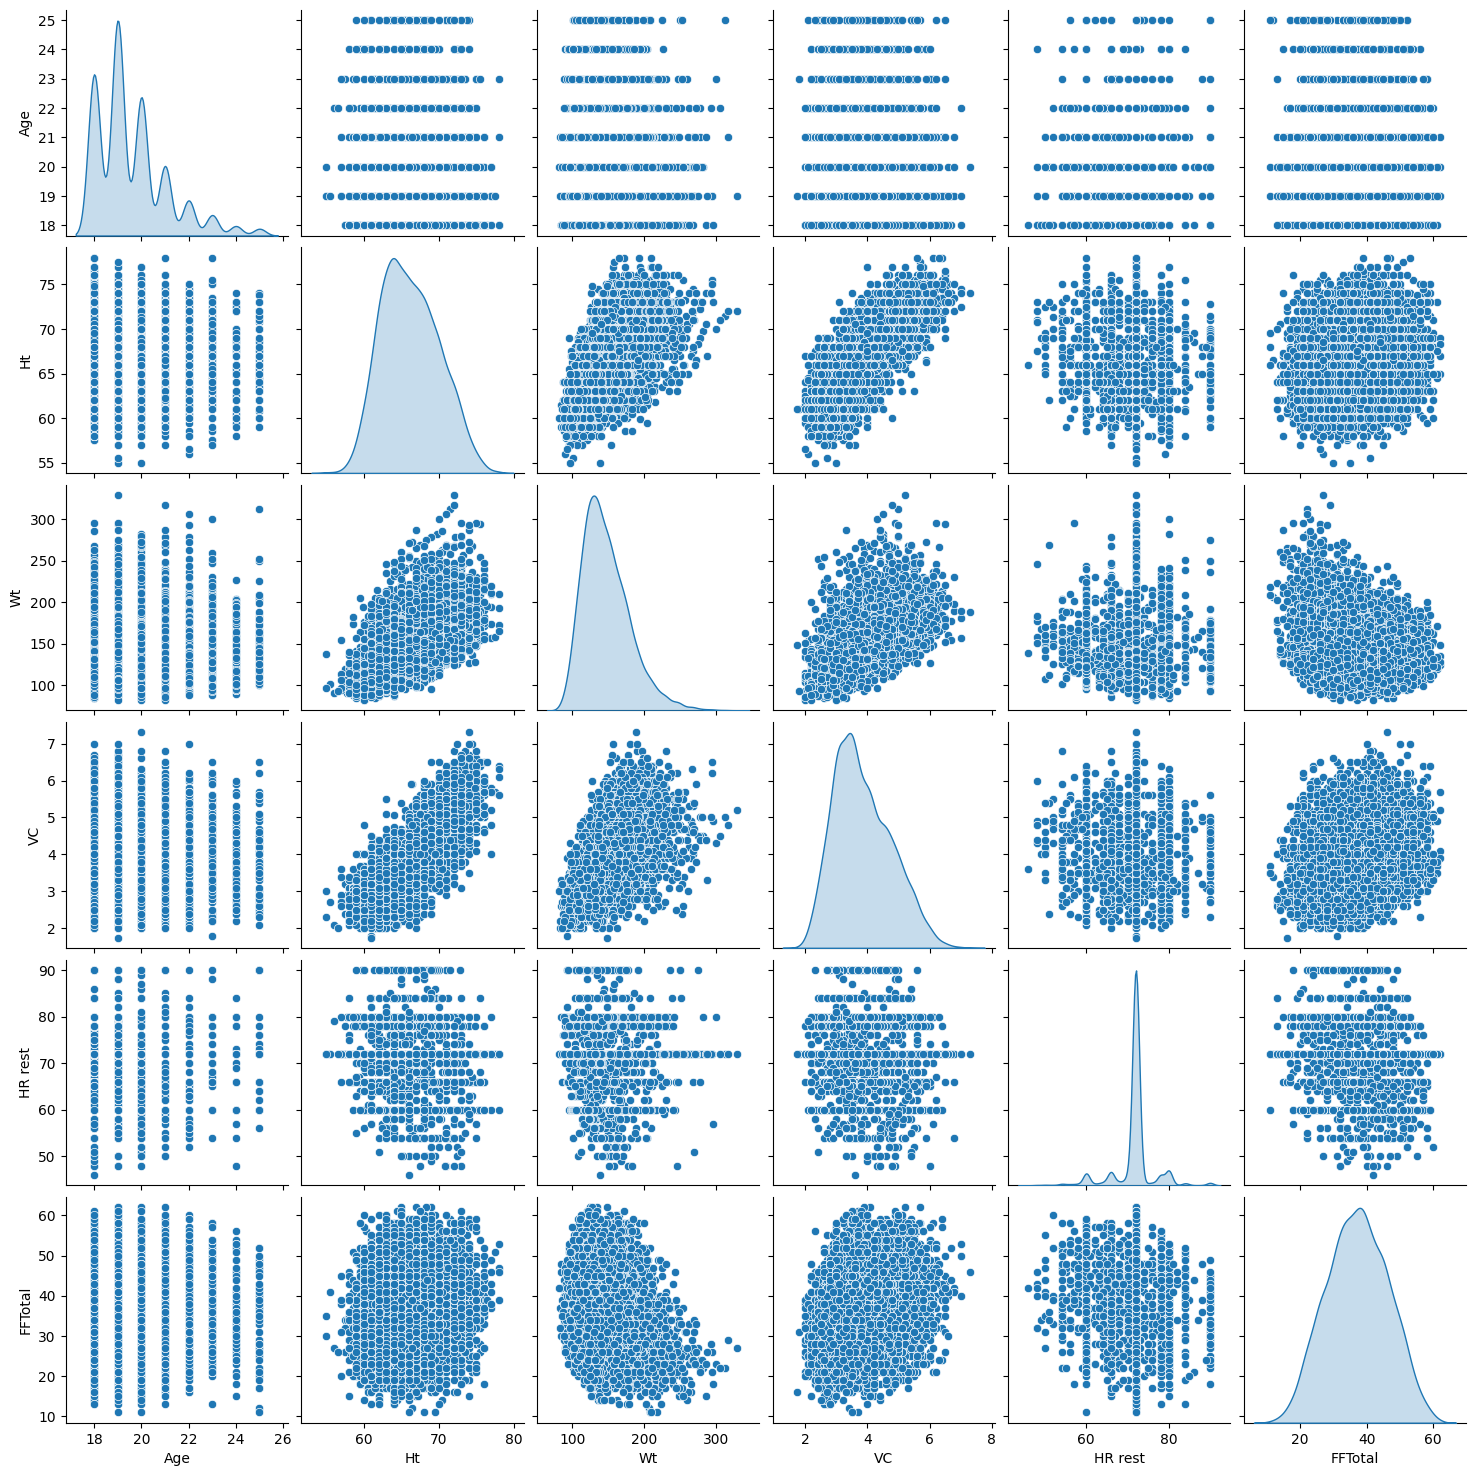

In [ ]:
# Identify 5 variables of interest based on data dictionary file descriptions
vars_for_eda = ['Age', 'Ht', 'Wt', 'VC', 'HR rest', 'FFTotal']

# Pairplot to visualize relationships
sns.pairplot(data[vars_for_eda], diag_kind='kde')
plt.show()

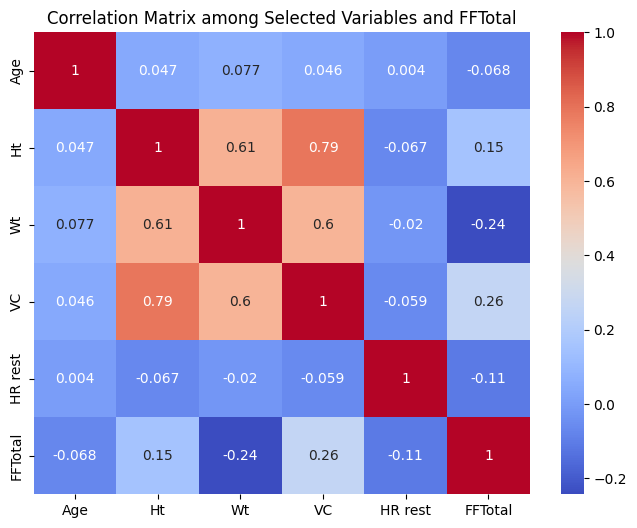

In [ ]:
# Correlation matrix
corr = data[vars_for_eda].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix among Selected Variables and FFTotal")
plt.show()

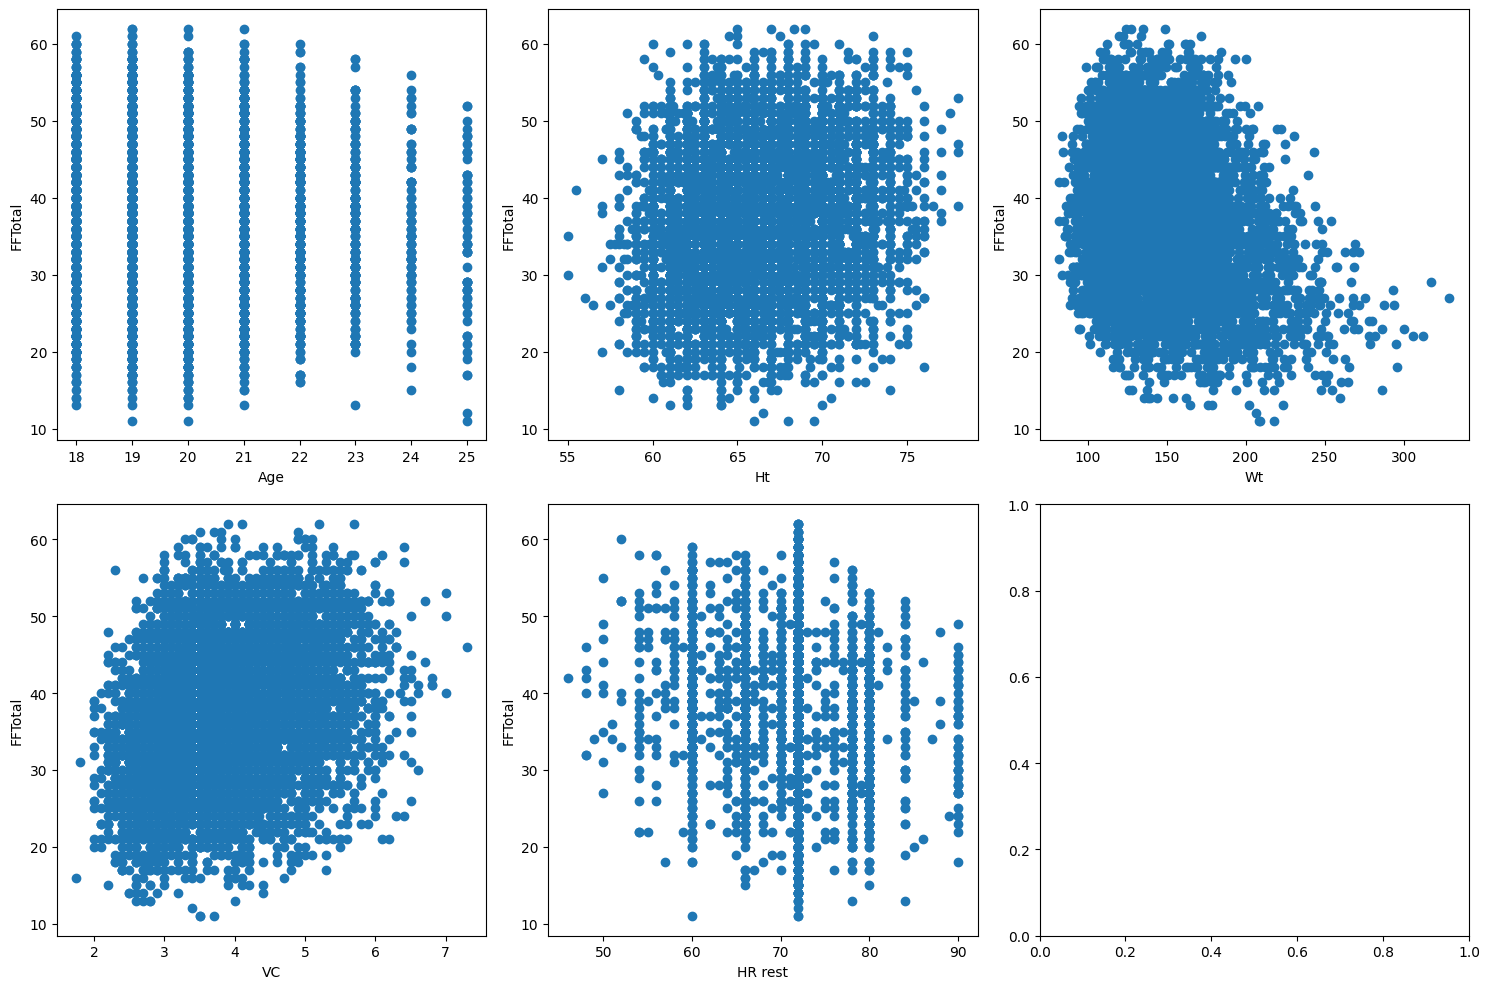

In [ ]:
# Scatter plots specifically with FFTotal
fig, axes = plt.subplots(2, 3, figsize=(15,10))
axes = axes.flatten()
for i, var in enumerate(vars_for_eda[:-1]):  # exclude FFTotal itself
    axes[i].scatter(data[var], data['FFTotal'])
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('FFTotal')
plt.tight_layout()
plt.show()

In [ ]:
# Split into test and train subsets
# Separate predictors (X) and target (y)
X = data[vars_for_eda[:-1]]  # all columns except FFTotal
y = data['FFTotal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Verify training and test sizes
display("Training set size:", X_train.shape[0])
display("Test set size:", X_test.shape[0])

'Training set size:'

3138

'Test set size:'

3138

# Stage 2: Linear Modeling

## Transformed Variables

To enhance predictive capability, we created three transformed variables:

1. **BMI:**
   BMI is a common metric relating weight and height, potentially capturing aspects of body composition more effectively than raw height or weight alone.

2. **WtHtRatio:**
   This ratio provides a simpler linear body composition metric. While less standard than BMI, it may capture subtle height-weight relationships.

3. **HR_VC_Ratio:**
   By combining resting heart rate and vital capacity, this transformation attempts to capture an interaction between cardiovascular and respiratory fitness factors.

## Models Tested

We constructed five linear regression models using various combinations of original and transformed predictors. Each model was trained on a randomly chosen 50% training set and tested on the remaining 50%:

1. **Model_1:** [Age, Ht, Wt, VC, HR rest] (Original variables only)  
2. **Model_2:** [Age, Ht, Wt, BMI] (Introduces BMI)  
3. **Model_3:** [BMI, VC, WtHtRatio] (Transformations only)  
4. **Model_4:** [Age, Ht, VC, HR_VC_Ratio] (Mix of original and one transformed variable)  
5. **Model_5:** [HR rest, Wt, BMI, WtHtRatio, HR_VC_Ratio] (More complex combination of original and multiple transformed features)


In [ ]:
# ----------------------------------
# Stage 2: Linear Modeling
# ----------------------------------

# 1) BMI: BMI = (Wt / Ht^2) * 703
X_train['BMI'] = (X_train['Wt'] / (X_train['Ht']**2)) * 703
X_test['BMI'] = (X_test['Wt'] / (X_test['Ht']**2)) * 703

# 2) WtHtRatio: ratio of Weight to Height, a simple body composition indicator
X_train['WtHtRatio'] = X_train['Wt'] / X_train['Ht']
X_test['WtHtRatio'] = X_test['Wt'] / X_test['Ht']

# 3) HR_VC_Ratio: ratio of resting heart rate to vital capacity,
# possibly capturing cardiovascular-respiratory fitness interplay
X_train['HR_VC_Ratio'] = X_train['HR rest'] / X_train['VC']
X_test['HR_VC_Ratio'] = X_test['HR rest'] / X_test['VC']

# Define 5 different sets of predictor variables
# We must try different combinations of original and transformed features.

models = {
    "Model_1": ["Age", "Ht", "Wt", "VC", "HR rest"],  # original variables only
    "Model_2": ["Age", "Ht", "Wt", "BMI"],            # include BMI
    "Model_3": ["BMI", "VC", "WtHtRatio"],            # transformations only
    "Model_4": ["Age", "Ht", "VC", "HR_VC_Ratio"],    # mix of original + transformed
    "Model_5": ["HR rest", "Wt", "BMI", "WtHtRatio", "HR_VC_Ratio"] # more complex combo
}

# Stage 3: Evaluation

## R² for All Models

| Model    | Predictors                                 | R² (Test)   | RMSE (Test) |
|----------|---------------------------------------------|-------------|-------------|
| Model_1  | Age, Ht, Wt, VC, HR rest                    | 0.31734     | 7.514163    |
| Model_2  | Age, Ht, Wt, BMI                            | 0.201391    | 8.127282    |
| Model_3  | BMI, VC, WtHtRatio                          | 0.308641    | 7.561887    |
| Model_4  | Age, Ht, VC, HR_VC_Ratio                    | 0.083492    | 8.706558    |
| Model_5  | HR rest, Wt, BMI, WtHtRatio, HR_VC_Ratio    | 0.323956    | 7.477661    |

## Best Model

The best model in terms of R² is **Model_5**, achieving:  
- **R² (Test):** 0.3240  
- **RMSE (Test):** 7.4777

Model_5’s predictors incorporate both original and transformed features, suggesting that combined indicators of body composition (BMI, WtHtRatio) and integrated cardiovascular-respiratory metrics (HR_VC_Ratio) offer a slight improvement over simpler models.

In [ ]:
# ----------------------------------
# Stage 3: Fitting and Evaluation
# ----------------------------------


results = {}
for m_name, predictors in models.items():
    # Drop rows from train/test that have NaN in the chosen predictors
    # (If any exist due to transformations)
    train_subset = X_train.dropna(subset=predictors)
    test_subset = X_test.dropna(subset=predictors)

    y_train_sub = y_train.loc[train_subset.index]
    y_test_sub = y_test.loc[test_subset.index]

    # Fit model
    lr = LinearRegression()
    lr.fit(train_subset[predictors], y_train_sub)
    y_pred = lr.predict(test_subset[predictors])

    # Calculate R² and RMSE on the test set
    r2 = r2_score(y_test_sub, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_sub, y_pred))

    results[m_name] = {
        "Predictors": predictors,
        "R2": r2,
        "RMSE": rmse
    }

# Convert results to DataFrame for better viewing
results_df = pd.DataFrame(results).T
display(results_df)

# Identify best model based on highest R²
best_model_name = results_df['R2'].idxmax()
best_model_r2 = results_df.loc[best_model_name, 'R2']
best_model_rmse = results_df.loc[best_model_name, 'RMSE']
best_predictors = results_df.loc[best_model_name, 'Predictors']

display(f"Best model: {best_model_name}")
display(f"Predictors: {best_predictors}")
display(f"R² (test): {best_model_r2:.4f}")
display(f"RMSE (test): {best_model_rmse:.4f}")

,Predictors,R2,RMSE
Model_1,"[Age, Ht, Wt, VC, HR rest]",0.31734,7.514163
Model_2,"[Age, Ht, Wt, BMI]",0.201391,8.127282
Model_3,"[BMI, VC, WtHtRatio]",0.308641,7.561887
Model_4,"[Age, Ht, VC, HR_VC_Ratio]",0.083492,8.706558
Model_5,"[HR rest, Wt, BMI, WtHtRatio, HR_VC_Ratio]",0.323956,7.477661


'Best model: Model_5'

"Predictors: ['HR rest', 'Wt', 'BMI', 'WtHtRatio', 'HR_VC_Ratio']"

'R² (test): 0.3240'

'RMSE (test): 7.4777'

# Conclusion

**Implications for Physical Fitness:**  
The best-performing model only explains about 32.4% of the variance in FFTotal, indicating that the chosen variables and linear approach capture some, but not most, of the variability in this fitness measure. The modest improvements from including BMI, WtHtRatio, and HR_VC_Ratio suggest that body composition and interactions between cardiovascular and respiratory measures have some relevance. However, the relatively low R² points to the likelihood that FFTotal depends on additional variables not included in this dataset or on non-linear relationships that a simple linear model cannot easily represent.

In summary:  
- **Significant Factors:** Transformations that combine anthropometric and physiological measures (BMI, HR_VC_Ratio) slightly improve predictive power.  
- **Not Significant:** Individual variables like Age or HR rest alone do not strongly predict FFTotal.  
- **Limitations and Next Steps:** Future work could involve exploring other variables, introducing polynomial or non-linear modeling techniques, or employing regularization and feature selection methods to improve predictive accuracy.

In [ ]:
def colab2pdf():
  # @title Download Notebook in PDF Format{display-mode:'form'}
  !apt-get install -yqq --no-install-recommends librsvg2-bin>/dev/null;
  import contextlib,datetime,google,io,IPython,ipywidgets,json,locale,nbformat,os,pathlib,requests,urllib,warnings,werkzeug,yaml,re;locale.setlocale(locale.LC_ALL,'en_US.UTF-8');warnings.filterwarnings('ignore',category=nbformat.validator.MissingIDFieldWarning);
  %matplotlib inline
  def convert(b):
    try:
      s.value='🔄 Converting';b.disabled=True
      n=pathlib.Path(werkzeug.utils.secure_filename(urllib.parse.unquote(requests.get(f'http://{os.environ["COLAB_JUPYTER_IP"]}:{os.environ["KMP_TARGET_PORT"]}/api/sessions').json()[0]['name'])))
      p=pathlib.Path('/content/pdfs')/f'{datetime.datetime.utcnow().strftime("%Y%m%d_%H%M%S")}_{n.stem}';p.mkdir(parents=True,exist_ok=True);nb=nbformat.reads(json.dumps(google.colab._message.blocking_request('get_ipynb',timeout_sec=600)['ipynb']),as_version=4)
      u=[u for c in nb.cells if c.get('cell_type')=='markdown' for u in re.findall(r'!\[.*?\]\((https?://.*?)\)',c['source']) if requests.head(u,timeout=5).status_code!=200]
      if u:raise Exception(f"Bad Image URLs: {','.join(u)}")
      nb.cells=[cell for cell in nb.cells if '--Colab2PDF' not in cell.source]
      nb=nbformat.v4.new_notebook(cells=nb.cells or [nbformat.v4.new_code_cell('#')]);nbformat.validator.normalize(nb)
      nbformat.write(nb,(p/f'{n.stem}.ipynb').open('w',encoding='utf-8'))
      with (p/'config.yml').open('w', encoding='utf-8') as f: yaml.dump({'include-in-header':[{'text':r'\usepackage{fvextra}\DefineVerbatimEnvironment{Highlighting}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines,breakanywhere,commandchars=\\\{\}}'}],'include-before-body':[{'text':r'\DefineVerbatimEnvironment{verbatim}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines}'}]},f)
      !quarto render {p}/{n.stem}.ipynb --metadata-file={p}/config.yml --to pdf -M latex-auto-install -M margin-top=1in -M margin-bottom=1in -M margin-left=1in -M margin-right=1in --quiet
      google.colab.files.download(str(p/f'{n.stem}.pdf'));s.value=f'✅ Downloaded: {n.stem}.pdf'
    except Exception as e:s.value=f'❌ {str(e)}'
    finally:b.disabled=False
  if not pathlib.Path('/usr/local/bin/quarto').exists():
    !wget -q 'https://quarto.org/download/latest/quarto-linux-amd64.deb' && dpkg -i quarto-linux-amd64.deb>/dev/null && quarto install tinytex --update-path --quiet && rm quarto-linux-amd64.deb
  b=ipywidgets.widgets.Button(description='⬇️ Download');s=ipywidgets.widgets.Label();b.on_click(lambda b:convert(b));IPython.display.display(ipywidgets.widgets.HBox([b,s]))
colab2pdf() # | Colab2PDF v1.6 | https://github.com/drengskapur/colab2pdf | GPL-3.0-or-later |

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>